<center><h1>Data Visualization</h1></center>

<i><center>Created by Chanchit Sewaleekunanon (March 2021)</center></i>

___
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The dataset that will be used in this project is 'supermarket_data.csv'. The dataset itself is from a company in the retail industry between the very beginning of 2007 to the mid of 2008. However, the main purpose of this project is to only visualize the data in several ways for seeking initial findings.

___
<h4>Libraries</h4>

In [1]:
import os
import re
import time
import datetime
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import statistics as st
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import rcParams
from PIL import Image

warnings.filterwarnings('ignore')
%matplotlib inline

___
<h4>Setting</h4>

In [2]:
# SETTINGS
os.getcwd()
os.chdir('.../filepath')

colors = ['#4E79A9','#A93226','#F28E2B','#59A14F','#BAB0AC','#E15759','#C70039']
sns.set_palette(colors)
sns.set_style('white')
pd.set_option('display.max_rows', 50)

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16
BIGGEST_SIZE = 18

rcParams['font.family'] = 'Times New Roman'
rcParams['font.weight'] = 'normal'
rcParams['figure.titleweight'] = 'bold'

plt.rc('font', size=SMALL_SIZE)             # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)       # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)        # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)       # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)       # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)       # legend fontsize
plt.rc('figure', titlesize=BIGGEST_SIZE)    # fontsize of the figure title

plt.rcParams["figure.figsize"] = (16,8)

___
<h4>Import Dataset</h4>

In [3]:
df = pd.read_csv('supermarket_data.csv')

# Change timestamp to datetime
df['SHOP_DATE'] = pd.to_datetime(df['SHOP_DATE'], format='%Y%m%d')
df['SHOP_HOUR'] = pd.to_datetime(df['SHOP_HOUR'], format='%H')

# Years & Months
df['SHOP_DATE_YEAR'] = df['SHOP_DATE'].apply(lambda i: i.year)
df['SHOP_DATE_MONTH'] = df['SHOP_DATE'].apply(lambda i: i.month)
df['SHOP_DATE_MONTHNAME'] = df['SHOP_DATE'].apply(lambda i: i.strftime('%b'))
df['SHOP_DATE_YEARMONTH'] = df['SHOP_DATE'].apply(lambda i: i.strftime('%Y%m'))

# Days
df['SHOP_DATE_DAY'] = df['SHOP_DATE'].apply(lambda i: i.day)
df['SHOP_DATE_DAYOFWEEK'] = df['SHOP_DATE'].apply(lambda i: i.dayofweek)
df['SHOP_DATE_DAYOFWEEKNAME'] = df['SHOP_DATE'].apply(lambda i: i.strftime('%a'))

# Hours #Note: Morning: 6-11, Afternoon: 12-18, Night: 19-23, the rest: Dawn
df['SHOP_HOUR'] = df['SHOP_HOUR'].apply(lambda i: i.hour)
hours_bins = [-0.1, 6, 11, 18, 23]
hours_labels = ['Dawn', 'Morning', 'Afternoon', 'Night']
df['SHOP_HOUR_TIMEDAY'] = pd.cut(df['SHOP_HOUR'], hours_bins, labels=hours_labels)

In [4]:
print(f"{df.isnull().sum()}\n{df.head(1).transpose()}")

SHOP_DATE                  0
SHOP_HOUR                  0
BASKET_ID                  0
CUST_CODE                  0
STORE_CODE                 0
PROD_CODE                  0
QUANTITY                   0
SPEND                      0
SHOP_DATE_YEAR             0
SHOP_DATE_MONTH            0
SHOP_DATE_MONTHNAME        0
SHOP_DATE_YEARMONTH        0
SHOP_DATE_DAY              0
SHOP_DATE_DAYOFWEEK        0
SHOP_DATE_DAYOFWEEKNAME    0
SHOP_HOUR_TIMEDAY          0
dtype: int64
                                           0
SHOP_DATE                2007-10-06 00:00:00
SHOP_HOUR                                 21
BASKET_ID                    994107800268406
CUST_CODE                     CUST0000153531
STORE_CODE                        STORE00001
PROD_CODE                         PRD0901391
QUANTITY                                   1
SPEND                                   0.37
SHOP_DATE_YEAR                          2007
SHOP_DATE_MONTH                           10
SHOP_DATE_MONTHNAME         

___
<h4>Functions for Viz</h4>

In [5]:
### Functions

# Autopct
def make_autopct(i):
    def autopct(pct):
        total = sum(i)
        values = int(round(pct * total / 100.0))
        return '{p:.1f}%\n({v:,.0f})'.format(p=pct, v=values)
    return autopct

# Donut Plot
def donut_plot(df, col, ax, label_names=None, text='', colors=['#4E79A9', '#BAB0AC'], circle_radius=0.8, title=f"", flag_noise=0):
    # Values
    values = df[col].value_counts().values
    if label_names is None:
        label_names = df[col].value_counts().index
    
    # Noise
    if flag_noise > 0:
        values = values[:-flag_noise]
        label_names = label_names[:-flag_noise]
    
    # Plotting Graph
    center_circle = plt.Circle((0, 0), circle_radius, color='white')
    ax.pie(values, labels=label_names, colors=colors, autopct=make_autopct(values))
    ax.add_artist(center_circle)

    # Setting center text argument
    kwargs = dict(size=15, fontweight='bold', va='center')
    ax.text(0, 0, text, ha='center', **kwargs)
    ax.set_title(title, size=15)

# Formatting axes of matplotlib
def format_spines(ax, right_border=True):
    
    # Setting up colors
    ax.spines['bottom'].set_color('#CCCCCC')
    ax.spines['left'].set_color('#CCCCCC')
    ax.spines['top'].set_visible(False)
    if right_border:
        ax.spines['right'].set_color('#CCCCCC')
    else:
        ax.spines['right'].set_color('#FFFFFF')
    ax.patch.set_facecolor('#FFFFFF')

# RemoveBorder
def removeBorder(ax):
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

# RemoveAxes
def removeAxes(ax):
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)

# Palette (SORT INDEX VERSION!)
def set_custom_palette(data, max_color = '#4E79A9', other_color = '#BAB0AC'):
    data = data.value_counts().sort_index()
    max_val = data.max()
    pal = []
    for item in data:
        if item == max_val:
            pal.append(max_color)
        else:
            pal.append(other_color)
    return pal

# Decent Bins
def compute_histogram_bins(data, desired_bin_size):
    min_val = np.min(data)
    max_val = np.max(data)
    min_boundary = -1.0 * (min_val % desired_bin_size - min_val)
    max_boundary = max_val - max_val % desired_bin_size + desired_bin_size
    n_bins = int((max_boundary - min_boundary) / desired_bin_size) + 1
    bins = np.linspace(min_boundary, max_boundary, n_bins)
    return bins

___
<h4>Data Viz 01</h4>

Text(0.5, 0.98, 'Data Viz 01')

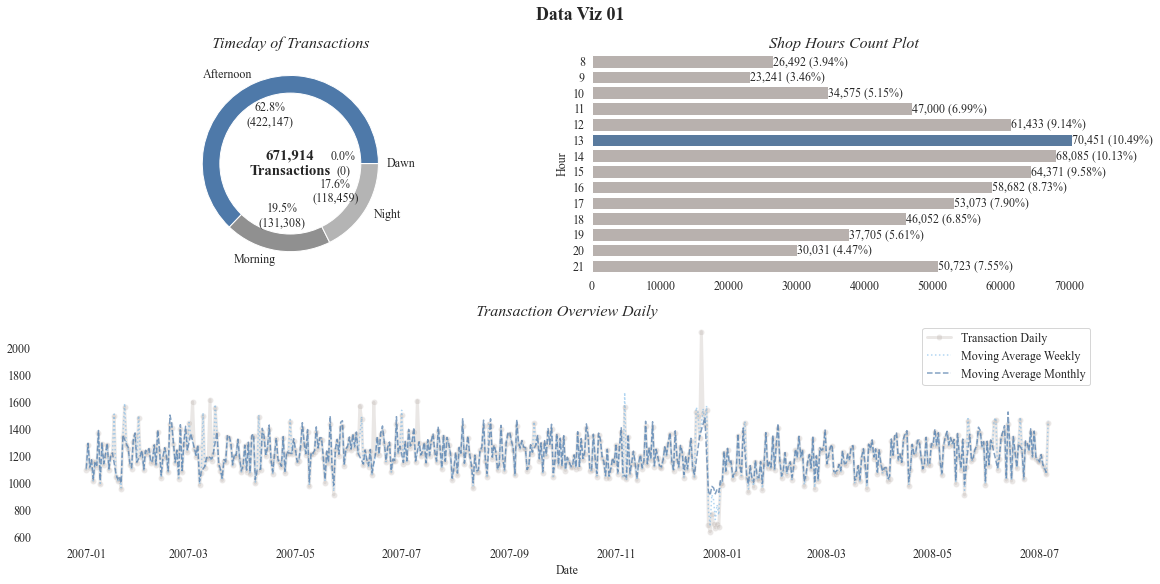

In [6]:
# Set colors
colors = ['#4E79A9','#909090','#B4B4B4','#D4D4D4']
fig = plt.figure(constrained_layout=True)
gs = GridSpec(2,2, figure=fig)
axes1 = fig.add_subplot(gs[0,0])
axes2 = fig.add_subplot(gs[0,1])
axes3 = fig.add_subplot(gs[1,:])

# Axes 1 - Donut Plot
donut_plot(df, col='SHOP_HOUR_TIMEDAY', ax=axes1, colors=colors, text=f"{len(df):,.0f}\nTransactions")
axes1.set_title('Timeday of Transactions', style='italic')

# Axes 2 - Countplot of Hours
set_custom_palette_HOURS = set_custom_palette(df['SHOP_HOUR'])
splot = sns.countplot(data=df, y='SHOP_HOUR', ax=axes2, palette=set_custom_palette_HOURS)
for p in splot.patches:
    ncount = len(df)
    x = p.get_bbox().get_points()[1, 0]
    y = p.get_bbox().get_points()[:, 1]
    splot.annotate('{:,} ({:.2f}%)'.format(int(x), 100. * x / ncount), (x, y.mean()), va='center')
axes2.axes.set_ylabel('Hour')
axes2.axes.set_xlabel('')
removeBorder(axes2)
axes2.set_title('Shop Hours Count Plot', style='italic')

# Axes 3 - Transactions Time Series
trans = pd.DataFrame(df['SHOP_DATE'].value_counts())
trans['MA7'] = trans['SHOP_DATE'].rolling(7).mean()
trans['MA30'] = trans['SHOP_DATE'].rolling(30).mean()
sns.lineplot(data=trans, x=trans.index, y='SHOP_DATE', ax=axes3, label='Transaction Daily', alpha=0.3, color='#BAB0AC', linewidth=3, marker='o')
sns.lineplot(data=trans, x=trans.index, y='MA7', ax=axes3, label='Moving Average Weekly', alpha=0.5, color='#63ace5', linestyle=':')
sns.lineplot(data=trans, x=trans.index, y='MA30', ax=axes3, label='Moving Average Monthly', alpha=0.7, color='#4E79A9', linestyle='--')
axes3.axes.set_xlabel('Date')
axes3.axes.set_ylabel('')
removeBorder(axes3)
axes3.set_title('Transaction Overview Daily', style='italic')

plt.suptitle('Data Viz 01')

___
<h4>Data Viz 02</h4>

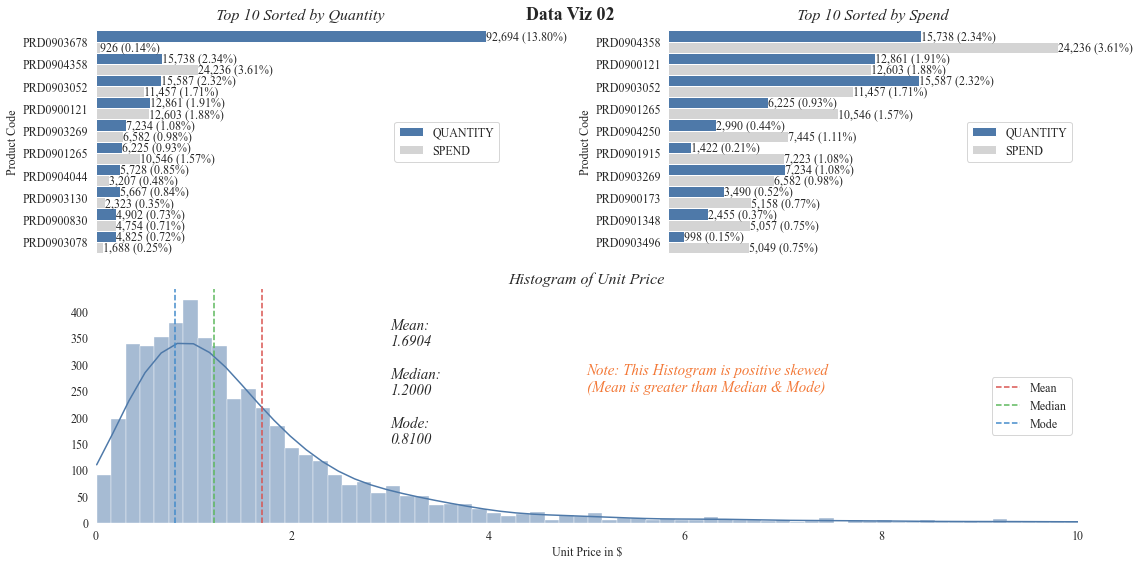

In [7]:
products = df[['PROD_CODE','QUANTITY','SPEND']].groupby(by='PROD_CODE').sum()

fig = plt.figure(constrained_layout=True)
gs = GridSpec(2,2, figure=fig)
axes1 = fig.add_subplot(gs[0,0])
axes2 = fig.add_subplot(gs[0,1])
axes3 = fig.add_subplot(gs[1,:])

# Axes01 - Bar Top 10 based Quantity
splot = products.sort_values(by='QUANTITY', ascending=False)[0:10].plot(kind='barh', width=1, align='center', ax=axes1, color=['#4E79A9','#D4D4D4'])
for p in splot.patches:
    ncount = len(df)
    x = p.get_bbox().get_points()[1, 0]
    y = p.get_bbox().get_points()[:, 1]
    splot.annotate('{:,} ({:.2f}%)'.format(int(x), 100. * x / ncount), (x, y.mean()), va='center')
axes1.invert_yaxis()
axes1.legend(loc='center right')
axes1.set_title('Top 10 Sorted by Quantity', style='italic')
axes1.axes.get_xaxis().set_visible(False)
axes1.axes.set_ylabel('Product Code')
removeBorder(axes1)

# Axes02 - Bar Top 10 based Spend
splot = products.sort_values(by='SPEND', ascending=False)[0:10].plot(kind='barh', width=1, align='center', ax=axes2, color=['#4E79A9','#D4D4D4'])
for p in splot.patches:
    ncount = len(df)
    x = p.get_bbox().get_points()[1, 0]
    y = p.get_bbox().get_points()[:, 1]
    splot.annotate('{:,} ({:.2f}%)'.format(int(x), 100. * x / ncount), (x, y.mean()), va='center')
axes2.invert_yaxis()
axes2.legend(loc='center right')
axes2.set_title('Top 10 Sorted by Spend', style='italic')
axes2.axes.get_xaxis().set_visible(False)
axes2.axes.set_ylabel('Product Code')
removeBorder(axes2)

# Axes03 - Histogram Unit Price
products['UNIT_PRICE'] = round(products['SPEND'] / products['QUANTITY'],2)
sns.histplot(products['UNIT_PRICE'], kde=True, color='#4E79A9', ax=axes3)
axes3.axvline(products['UNIT_PRICE'].mean(), color='#d9534f', linestyle='--', label='Mean')
axes3.axvline(products['UNIT_PRICE'].median(), color='#5cb85c', linestyle='--', label='Median')
unit_price_mode = st.mode(products['UNIT_PRICE'])
axes3.axvline(unit_price_mode, color='#428bca', linestyle='--', label='Mode')
axes3.text(3,150,f"Mean:\n{products['UNIT_PRICE'].mean():.4f}\n\nMedian:\n{products['UNIT_PRICE'].median():.4f}\n\nMode:\n{unit_price_mode:.4f}", fontsize='15', style='italic')
axes3.text(5,250,f"Note: This Histogram is positive skewed \n(Mean is greater than Median & Mode)",fontsize='15', style='italic', color='#f37735')
axes3.set_title('Histogram of Unit Price', style='italic')
removeBorder(axes3)
axes3.axes.set_xlabel('Unit Price in $')
axes3.axes.set_ylabel('')
axes3.legend(loc='center right')
axes3.set_xlim([0,10])

plt.suptitle('Data Viz 02')
plt.tight_layout()

___
<h4>Data Viz 03</h4>

Text(0.5, 0.98, 'Data Viz 03')

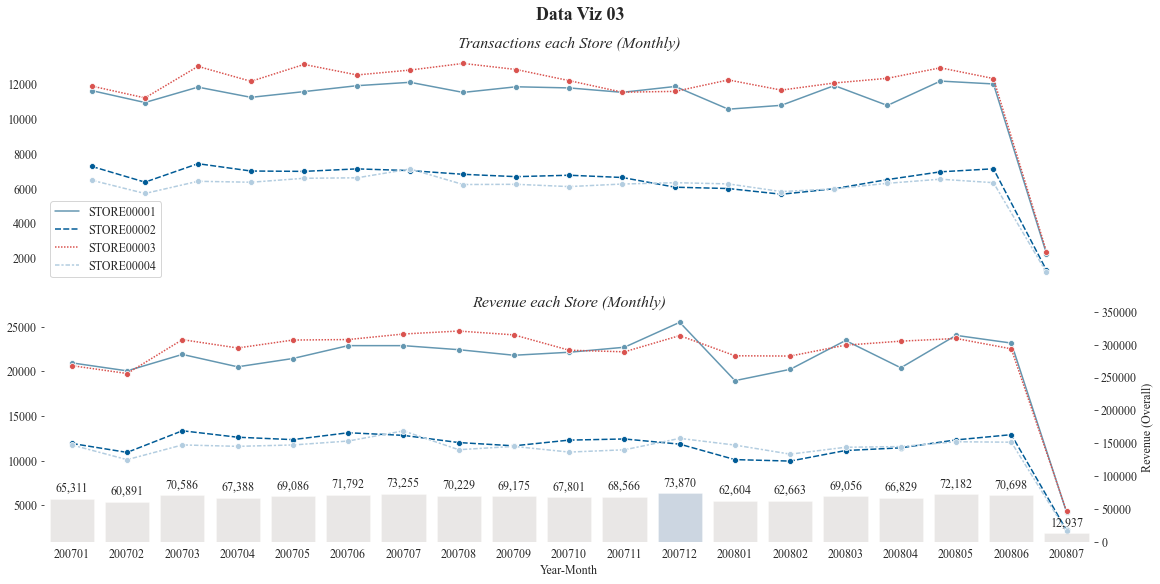

In [8]:
dummy_store = pd.get_dummies(df['STORE_CODE'])
store = df['SHOP_DATE_YEARMONTH']
store_df = pd.concat([store, dummy_store], axis=1)
store_df = store_df.groupby(by='SHOP_DATE_YEARMONTH').sum()

fig = plt.figure(constrained_layout=True)
gs = GridSpec(2, 2, figure=fig)
axes1 = fig.add_subplot(gs[0, :])
axes2 = fig.add_subplot(gs[1, :])

# Axes 01 - Transactions
colors = ['#6497b1','#005b96', '#d9534f','#b3cde0']
sns.lineplot(data=store_df, ax=axes1, palette=colors, marker='o')
removeBorder(axes1)
axes1.set_title('Transactions each Store (Monthly)', style='italic')
axes1.axes.get_xaxis().set_visible(False)
axes1.legend()

# Axes 02 - Revenue
dummy_store_spend = pd.get_dummies(df['STORE_CODE'])
store_spend = df[['SHOP_DATE_YEARMONTH','SPEND']]
store_spend_df = pd.concat([store_spend, dummy_store_spend], axis=1)
#Replace value in dummies
store_spend_df['STORE00001'] = [store_spend_df['SPEND'][index] if value == 1 else value for index, value in enumerate(store_spend_df['STORE00001'])]
store_spend_df['STORE00002'] = [store_spend_df['SPEND'][index] if value == 1 else value for index, value in enumerate(store_spend_df['STORE00002'])]
store_spend_df['STORE00003'] = [store_spend_df['SPEND'][index] if value == 1 else value for index, value in enumerate(store_spend_df['STORE00003'])]
store_spend_df['STORE00004'] = [store_spend_df['SPEND'][index] if value == 1 else value for index, value in enumerate(store_spend_df['STORE00004'])]
store_spend_df = store_spend_df.groupby(by='SHOP_DATE_YEARMONTH').sum()

# Axes2-Line
colors = ['#6497b1','#005b96', '#d9534f','#b3cde0']
sns.lineplot(data=store_spend_df[['STORE00001', 'STORE00002', 'STORE00003', 'STORE00004']], ax=axes2, palette=colors, marker='o')
axes2.set_title('Revenue each Store (Monthly)', style='italic')
axes2.get_legend().set_visible(False)
axes2.axes.set_xlabel('Year-Month')
removeBorder(axes2)

#Palette Highlighted
def set_custom_palette(data, max_color = '#4E79A9', other_color = '#BAB0AC'):
    max_val = data.max()
    pal = []
    for item in data:
        if item == max_val:
            pal.append(max_color)
        else:
            pal.append(other_color)
    return pal
# Axes2-Bar
axes2_twx = axes2.twinx()
palette_store_spend = set_custom_palette(store_spend_df['SPEND'])
splot = sns.barplot(data=store_spend_df, y='SPEND', x=store_spend_df.index, palette=palette_store_spend, ax=axes2_twx, alpha=0.3)
for p in splot.patches:
    splot.annotate(format(p.get_height(), ',.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
axes2_twx.set_yticks(np.arange(0, 400000, 50000))
axes2_twx.axes.set_ylabel('Revenue (Overall)')
removeBorder(axes2_twx)

plt.suptitle('Data Viz 03')

___
<h4>Data Viz 04</h4>

Text(0.5, 0.98, 'Data Viz 04')

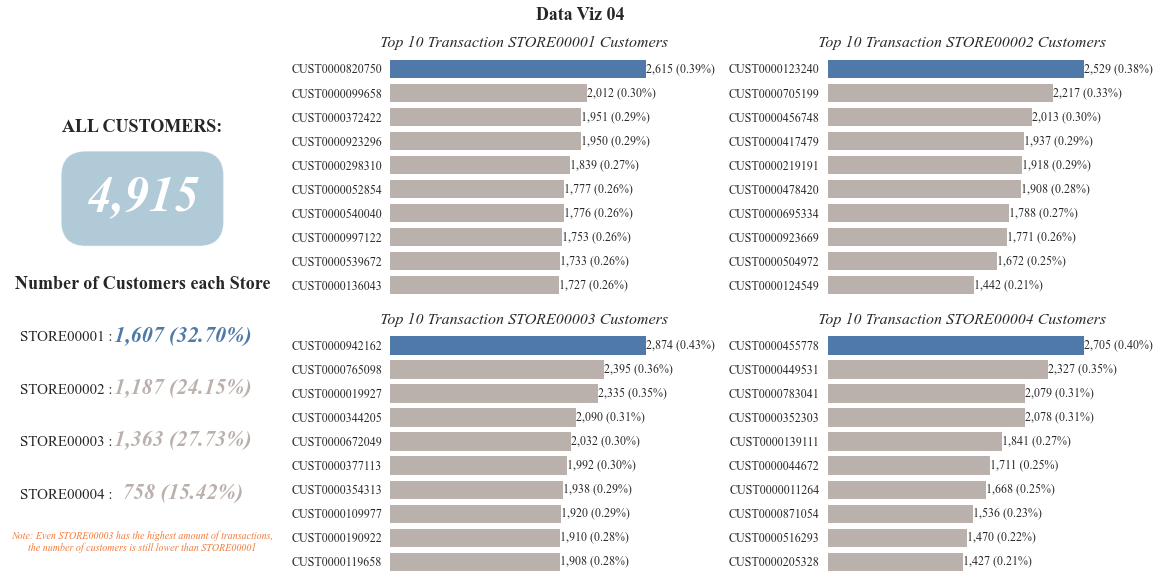

In [9]:
customers = df[['CUST_CODE','STORE_CODE']]
customers['STORE_CODE'].value_counts().sort_index()
store1_n = len(customers[customers['STORE_CODE']=='STORE00001'].value_counts())
store2_n = len(customers[customers['STORE_CODE']=='STORE00002'].value_counts())
store3_n = len(customers[customers['STORE_CODE']=='STORE00003'].value_counts())
store4_n = len(customers[customers['STORE_CODE']=='STORE00004'].value_counts())
store1_percent = store1_n / len(customers.value_counts())*100
store2_percent = store2_n / len(customers.value_counts())*100
store3_percent = store3_n / len(customers.value_counts())*100
store4_percent = store4_n / len(customers.value_counts())*100

fig = plt.figure(constrained_layout=True)
gs = GridSpec(2,3, figure=fig)
axes1 = fig.add_subplot(gs[0:,0])
axes2 = fig.add_subplot(gs[0,1])
axes3 = fig.add_subplot(gs[0,2])
axes4 = fig.add_subplot(gs[1,1])
axes5 = fig.add_subplot(gs[1,2])

palette_stores_top10cust = ['#4E79A9','#BAB0AC','#BAB0AC','#BAB0AC','#BAB0AC','#BAB0AC','#BAB0AC','#BAB0AC','#BAB0AC','#BAB0AC']

# Axes 1 - Texts
axes1.text(0.50, 0.85, f"ALL CUSTOMERS:", fontsize=18, weight='bold', ha='center')
axes1.text(0.50, 0.70, f"{len(customers.value_counts()):,.0f}",fontsize=50,color='white', ha='center', 
           weight='bold',style='italic', bbox=dict(facecolor='#6497b1',alpha=0.5, pad=10, boxstyle='round, pad=.5'))

axes1.text(0.50, 0.55, f"Number of Customers each Store", ha='center', weight='bold', fontsize=18)

axes1.text(0.26, 0.45, f"STORE00001 :      ", ha='center', fontsize=15)
axes1.text(0.65, 0.45, f"{store1_n:,.0f} ({store1_percent:.2f}%)", fontsize=22, ha='center',
           weight='bold', color='#4E79A9', style='italic')

axes1.text(0.26, 0.35, f"STORE00002 :      ", ha='center', fontsize=15)
axes1.text(0.65, 0.35, f"{store2_n:,.0f} ({store2_percent:.2f}%)", fontsize=22, ha='center',
           weight='bold', color='#BAB0AC', style='italic')

axes1.text(0.26, 0.25, f"STORE00003 :      ", ha='center', fontsize=15)
axes1.text(0.65, 0.25, f"{store3_n:,.0f} ({store3_percent:.2f}%)", fontsize=22, ha='center',
           weight='bold', color='#BAB0AC', style='italic')

axes1.text(0.26, 0.15, f"STORE00004 :      ", ha='center', fontsize=15)
axes1.text(0.65, 0.15, f"{store4_n:,.0f} ({store4_percent:.2f}%)", fontsize=22, ha='center',
           weight='bold', color='#BAB0AC', style='italic')

axes1.text(0.5, 0.05, f"Note: Even STORE00003 has the highest amount of transactions,\nthe number of customers is still lower than STORE00001", ha='center',
          color='#f37735', style='italic', fontsize=10)

axes1.axis('off')

# Axes 2 - Top 10 Customer Store00001
splot = customers['CUST_CODE'][customers['STORE_CODE']=='STORE00001'].value_counts()[0:10].plot(kind='barh', ax=axes2, width=0.80, align='center', color=palette_stores_top10cust)
for p in splot.patches:
    ncount = len(customers)
    x = p.get_bbox().get_points()[1, 0]
    y = p.get_bbox().get_points()[:, 1]
    splot.annotate('{:,} ({:.2f}%)'.format(int(x), 100. * x / ncount), (x, y.mean()), va='center')

axes2.set_title('Top 10 Transaction STORE00001 Customers', style='italic')
axes2.invert_yaxis()
axes2.axes.get_xaxis().set_visible(False)
removeBorder(axes2)

# Axes 3 - Top 10 Customer Store00002
splot = customers['CUST_CODE'][customers['STORE_CODE']=='STORE00002'].value_counts()[0:10].plot(kind='barh', ax=axes3, width=0.80, align='center', color=palette_stores_top10cust)
for p in splot.patches:
    ncount = len(customers)
    x = p.get_bbox().get_points()[1, 0]
    y = p.get_bbox().get_points()[:, 1]
    splot.annotate('{:,} ({:.2f}%)'.format(int(x), 100. * x / ncount), (x, y.mean()), va='center')

axes3.set_title('Top 10 Transaction STORE00002 Customers', style='italic')
axes3.invert_yaxis()
axes3.axes.get_xaxis().set_visible(False)
removeBorder(axes3)

# Axes 4 - Top 10 Customer Store00003
splot = customers['CUST_CODE'][customers['STORE_CODE']=='STORE00003'].value_counts()[0:10].plot(kind='barh', ax=axes4, width=0.80, align='center', color=palette_stores_top10cust)
for p in splot.patches:
    ncount = len(customers)
    x = p.get_bbox().get_points()[1, 0]
    y = p.get_bbox().get_points()[:, 1]
    splot.annotate('{:,} ({:.2f}%)'.format(int(x), 100. * x / ncount), (x, y.mean()), va='center')

axes4.set_title('Top 10 Transaction STORE00003 Customers', style='italic')
axes4.axes.get_xaxis().set_visible(False)
axes4.invert_yaxis()
removeBorder(axes4)

# Axes 5 - Top 10 Customer Store00004
splot = customers['CUST_CODE'][customers['STORE_CODE']=='STORE00004'].value_counts()[0:10].plot(kind='barh', ax=axes5, width=0.80, align='center', color=palette_stores_top10cust)
for p in splot.patches:
    ncount = len(customers)
    x = p.get_bbox().get_points()[1, 0]
    y = p.get_bbox().get_points()[:, 1]
    splot.annotate('{:,} ({:.2f}%)'.format(int(x), 100. * x / ncount), (x, y.mean()), va='center')

axes5.set_title('Top 10 Transaction STORE00004 Customers', style='italic')
axes5.axes.get_xaxis().set_visible(False)
axes5.invert_yaxis()
removeBorder(axes5)

plt.suptitle('Data Viz 04')

___
<h4>Data Viz 05</h4>

Text(0.5, 0.98, 'Data Viz 05')

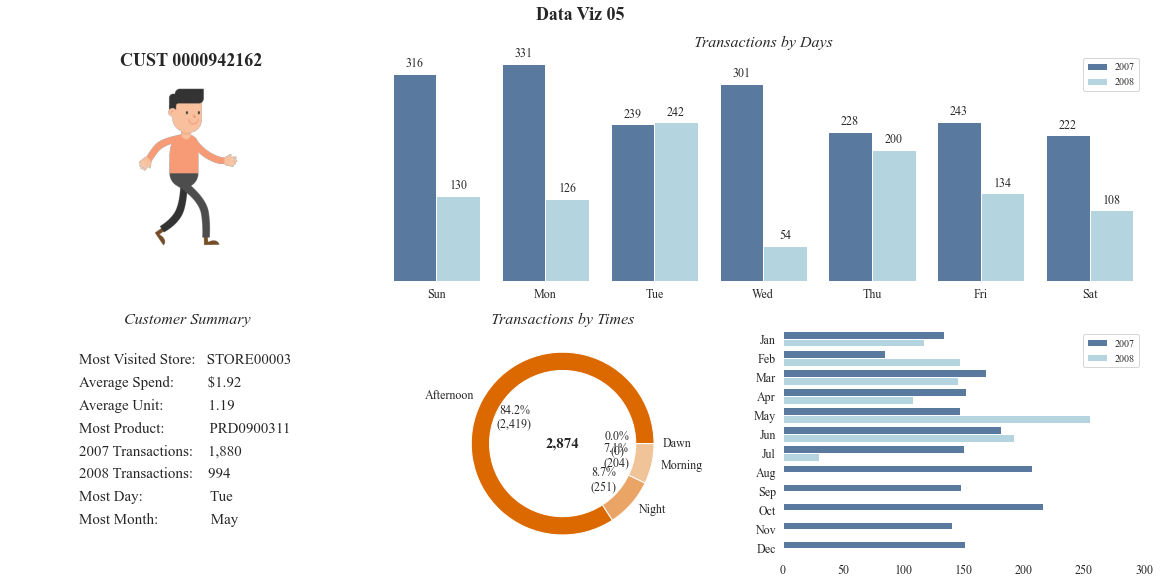

In [10]:
im_happy = Image.open('person.png')
indi_cust = df[df['CUST_CODE']=='CUST0000942162'][['CUST_CODE', 'STORE_CODE','PROD_CODE', 'QUANTITY', 'SPEND', 'SHOP_DATE_YEAR','SHOP_DATE_MONTHNAME','SHOP_DATE_DAYOFWEEK', 'SHOP_DATE_DAYOFWEEKNAME', 'SHOP_HOUR', 'SHOP_HOUR_TIMEDAY']]
indi_cust = indi_cust.reset_index(drop=True)
most_store = indi_cust['STORE_CODE'].value_counts()[0:1]
most_product = indi_cust['PROD_CODE'].value_counts()[0:1]
most_day = indi_cust['SHOP_DATE_DAYOFWEEKNAME'].value_counts()[0:1]
most_month = indi_cust['SHOP_DATE_MONTHNAME'].value_counts()[0:1]

fig = plt.figure(constrained_layout=True)
gs = GridSpec(2,3, figure=fig)
axes1 = fig.add_subplot(gs[0,0])
axes11 = fig.add_subplot(gs[1,0])
axes2 = fig.add_subplot(gs[0,1:])
axes3 = fig.add_subplot(gs[1,1])
axes4 = fig.add_subplot(gs[1,2])

# Axes 1
axes1.imshow(im_happy)
axes1.text(650, 0, f"CUST 0000942162", ha='center', fontsize=18, weight='bold')
removeBorder(axes1)
removeAxes(axes1)

axes11.text(0.2,0.85,f"Most Visited Store:   {str(most_store.index.values)[2:-2]}", fontsize=15)
axes11.text(0.2,0.75,f"Average Spend:         ${indi_cust['SPEND'].mean():.2f}", fontsize=15)
axes11.text(0.2,0.65,f"Average Unit:            {indi_cust['QUANTITY'].mean():.2f}", fontsize=15)
axes11.text(0.2,0.55,f"Most Product:            {str(most_product.index.values)[2:-2]}", fontsize=15)
axes11.text(0.2,0.45,f"2007 Transactions:    {len(indi_cust[indi_cust['SHOP_DATE_YEAR']==2007]):,}", fontsize=15)
axes11.text(0.2,0.35,f"2008 Transactions:    {len(indi_cust[indi_cust['SHOP_DATE_YEAR']==2008]):,}", fontsize=15)
axes11.text(0.2,0.25,f"Most Day:                  {str(most_day.index.values)[2:-2]}", fontsize=15)
axes11.text(0.2,0.15,f"Most Month:              {str(most_month.index.values)[2:-2]}", fontsize=15)

axes11.set_title('Customer Summary', style='italic')
removeBorder(axes11)
removeAxes(axes11)

# Axes 2
days_labels = ['Sun','Mon','Tue','Wed','Thu','Fri','Sat']
splot = sns.countplot(data=indi_cust, x='SHOP_DATE_DAYOFWEEKNAME', hue='SHOP_DATE_YEAR', order=days_labels, palette=['#4E79A9','#ADD8E6'], ax=axes2)
for p in splot.patches:
    splot.annotate(format(p.get_height(), ',.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

removeBorder(axes2)
axes2.legend(loc='upper right', prop={'size': 10})
axes2.axes.get_yaxis().set_visible(False)
axes2.axes.set_xlabel('')
axes2.set_title('Transactions by Days', style='italic')

# Axes 3
colors = ['#dc6900','#eaa566','#f1c399','#fbf0e5']
donut_plot(indi_cust, col='SHOP_HOUR_TIMEDAY', ax=axes3, colors=colors, text=f"{len(indi_cust):,}")
axes3.set_title('Transactions by Times', style='italic')

# Axes 4
months_label = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
splot = sns.countplot(data=indi_cust, y='SHOP_DATE_MONTHNAME', hue='SHOP_DATE_YEAR', order=months_label, palette=['#4E79A9','#ADD8E6'], ax=axes4)
axes4.set_xlim([0,300])
axes4.legend(loc='upper right', prop={'size': 10})
axes4.axes.set_xlabel('')
axes4.axes.set_ylabel('')
removeBorder(axes4)

plt.suptitle('Data Viz 05')

<center><h1>END</h1></center>

<center>Thank you!</center>